# Percentile results
This notebook reflects the results obtained for the psycho network

In [57]:
import os, sys
sys.path.insert(0, '../')
from matplotlib import style
style.use('seaborn-poster')
from Utils import stats, IO
import matplotlib.pyplot as plt, numpy as np, scipy,\
networkx as nx
fn = 'data2019-11-11T11:16:28.427495.pickle'
fn = 'data2019-11-17T10:00:22.689166.pickle'
fn = 'data2019-11-18T09:41:31.414702.pickle'
for k,v in IO.loadPickle(fn).items():
    globals()[k] = v
    print(f'Loading {k}')

    
centralities = dict(\
                   degree = nx.degree_centrality,\
                   betweenness = nx.betweenness_centrality,\
                   closeness  = nx.closeness_centrality,\
                   eigenvector = nx.eigenvector_centrality,\
                   )
conditions = len(centralities) + 1
# print(settings)

fn = '../Data//2019-11-18T09:29:52.086011/settings.pickle'
for k, v in IO.loadPickle(fn).items():
    print(k, v)

Loading aucs
Loading data
Loading rata
Loading settings
Loading coeffs
model <Models.FastIsing.Ising object at 0x55df9b413de0>
repeats 10000
deltas 30
steps 1000
nSamples 1000
burninSamples 0
nTrials 20
modelSettings {'magSide': '', 'updateType': '0.5', 'nudgeType': 'constant'}
tempres 100
pulseSizes [0.1, 0.2, 0.3, inf]
graph 
equilibrium {'mag': array([[1.00000000e-01, 1.20045494e-01, 1.44109205e-01, 1.72996607e-01,
        2.07674631e-01, 2.49304036e-01, 2.99278261e-01, 3.59270066e-01,
        4.31287524e-01, 5.17741237e-01, 6.21525024e-01, 7.46112784e-01,
        8.95674774e-01, 1.07521720e+00, 1.29074980e+00, 1.54948697e+00,
        1.86008928e+00, 2.23295336e+00, 2.68055989e+00, 3.21789135e+00,
        3.86293356e+00, 4.63727766e+00, 5.56684286e+00, 6.68274399e+00,
        8.02233302e+00, 9.63044927e+00, 1.15609204e+01, 1.38783639e+01,
        1.66603505e+01, 2.00000000e+01],
       [9.75253267e-01, 9.84507514e-01, 9.92111979e-01, 9.75021267e-01,
        1.00000000e+00, 9.6223545

In [54]:
%load_ext autoreload
%autoreload 2
DRIVERS = {}
alpha = .01
from tqdm import tqdm_notebook as tqdm
from Utils.stats import bootStrapDrivers
N, n = int(1e4), 1000

N = int(1e4)
# for all aucs

# from Utils.stats import bootStrapThresholds
alphas = np.linspace(0.1, 1, 10)
alphas  = np.array([0, .05])
structuralData = {}
for k, setting in settings.items():
    m = setting.get('model')
    g = m.graph
    
    buffer = np.zeros((m.nNodes))
    centData = {}
    for condition, cf in centralities.items():
        c = cf(g)
        for node, val in c.items():
            idx = m.mapping[node]
            buffer[idx] = val
        MAX = buffer.max()
        cdrivers = np.where(buffer == MAX)[0]
        centData[condition] = cdrivers
    structuralData[k] = centData
    
from Utils.stats import returnX
tmp = next(iter(aucs.values()))[..., 0, 0]
boots = bootStrap(tmp.T, returnX, 1000, 100).mean(1)

from Utils.stats import bootStrapDriversThresholds
alphas = np.linspace(0, .5, 5)
d = bootStrapDriversThresholds(boots, alphas)

for k, v in d.items():
    print(k, len(v))
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.0 12
0.125 4
0.25 3
0.375 1
0.5 1


In [5]:
from Utils.stats import computeMatchScore
for k, v in alphaData.items():
    alphas = list(v.keys())
    print(v.keys())
    for alpha in  alphas:
        tmp = v.get(alpha)
#         print(type(tmp))
        ALLDRIVERS = tmp.get('ALLDRIVERS')
        overlaps, driverSizes = computeMatchScore(ALLDRIVERS)
        tmp['overlaps'] = overlaps
        tmp['driverSizes'] = driverSizes
        v[alpha] = tmp

dict_keys([0.0, 0.05])


/home/casper/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/casper/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:206: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-7dc0639e4082>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


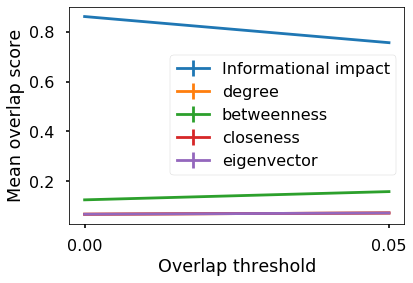

In [7]:
performance = np.zeros((len(aucs), len(alphas), 5))

scorer = np.mean
for idx, (k, v) in enumerate(alphaData.items()):
    for jdx, (alpha, aData) in enumerate(v.items()):
        
#         print(aData['overlaps'].shape); assert 0 
        performance[idx, jdx] = scorer(\
                                       aData.get('overlaps').reshape(-1, 5),\
                                       
                                       axis = 0)
    
from scipy.stats import sem
fig, ax = plt.subplots()

colors =  plt.cm.tab10(range(conditions))
conditionLabels = ['Informational impact', *list(centralities.keys())]
for i in range(5):
    tmp = performance[..., i]
#     tmp = tmp.mean(0)
    ax.errorbar(alphas, scorer(tmp, 0), sem(tmp, 0), color = colors[i], label = conditionLabels[i])
# ax.errorbar(alphas, np.max(performance, 0), sem(performance, 0), label = 'max')
ax.set_xticks(alphas)
ax.set_ylabel('Mean overlap score')
ax.set_xlabel("Overlap threshold")
ax.legend()
fig.savefig('Overlap_threshold.svg', bbox_inches = 'tight',\
           pad_inches = 0)
fig.show()

(1, 5, 3)


<ipython-input-17-0884c56e6f18>:50: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


0


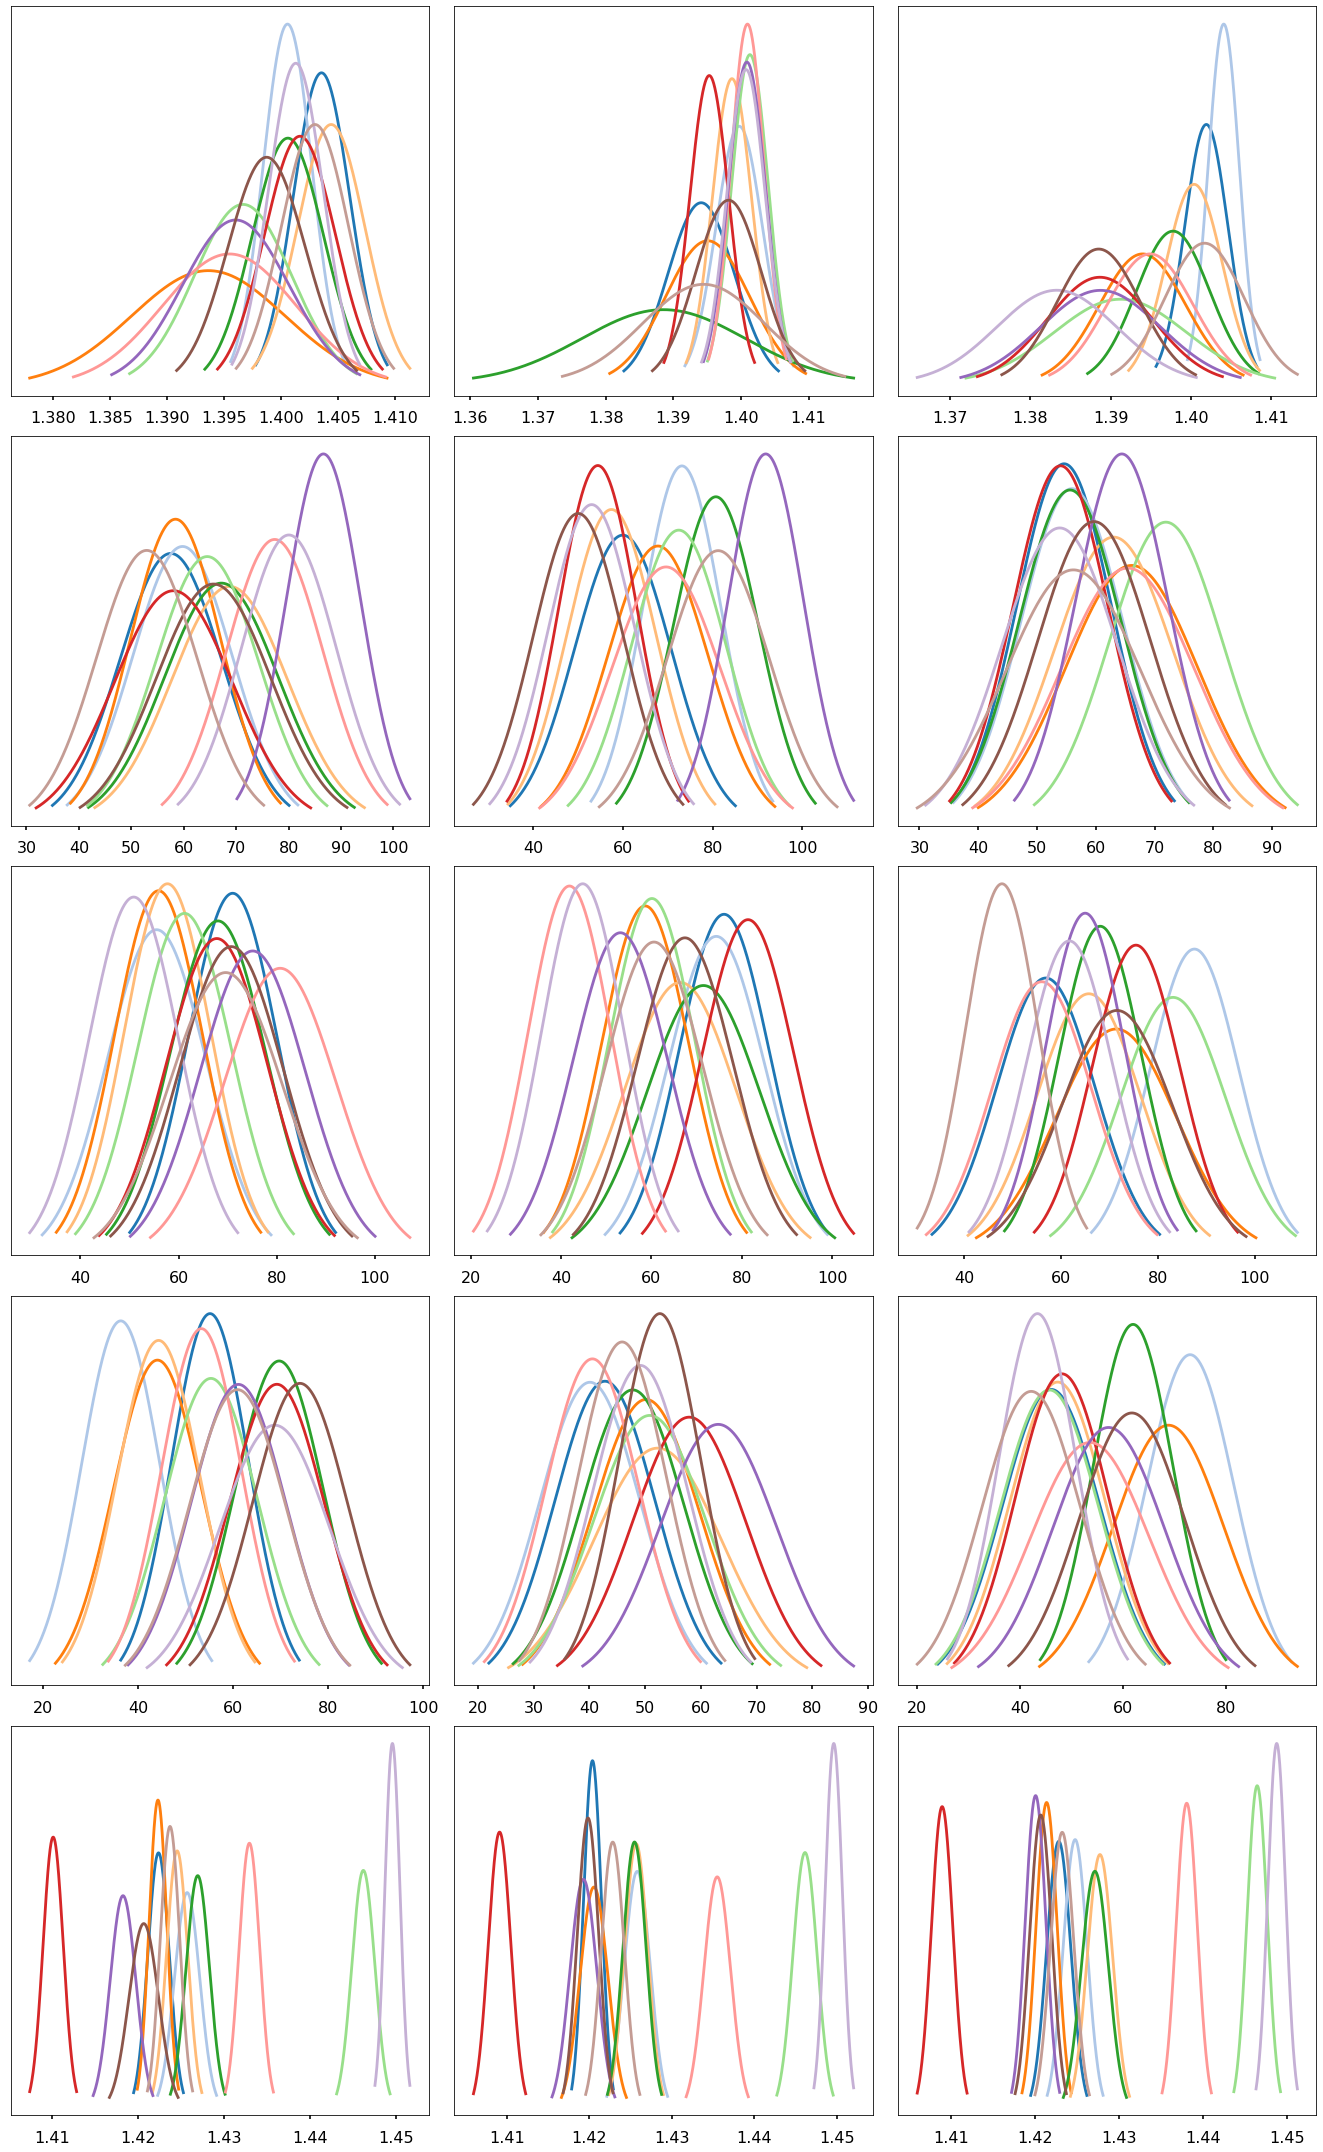

In [17]:
from scipy.stats import norm
from itertools import product
bestAlpha = np.moveaxis(performance, 2, 1).reshape(-1, len(alphas)).mean(0).argmax()
tmp = np.array([i for i in aucs.values()])
_, nnodes, trials, npulse, temp = tmp.shape
bestAlpha = alphas[bestAlpha]
BINNEDDRIVERS = [i.get(bestAlpha).get('BINNEDDRIVERS') for i in alphaData.values()]
tmp = np.array(BINNEDDRIVERS, dtype = dict)
# tmp = np.array([ i for i in BINNEDDRIVERS.values()], dtype = dict)
print(tmp.shape)
ndata, npulse, ntemp = tmp.shape
# nconds = 5
%matplotlib inline
colors = plt.cm.tab20(range(nnodes))





# xr = np.logspace(-2, 1, 50)

theta = .01
xr = np.geomspace(1, 10, 20)
# ax  = np.zeros((ndata, nconds), dtype = object)

for di, d in enumerate(tmp):
    fig = plt.figure(constrained_layout = 1,\
                figsize = (20, 30),\
                )

    wr = np.ones(ntemps + 1)
    wr[-1] = .2
    gs = fig.add_gridspec(nrows = nconds, ncols = ntemps + 1, width_ratios = wr)
    for (ci, ti) in product(*map(range, (npulse, ntemp))):
        axi = fig.add_subplot(gs[ci, ti])
        dj = d[ci, ti]

        means = np.array([mean for mean, _ in dj.values()])
        xr = np.linspace(means.min() - .2, means.max() + .2, 1000)
        e = np.zeros((len(d), xr.size))
        for nodeidx, (node, (mean, loc)) in enumerate(dj.items()):
    #             left, right = [norm.ppf(i, *normit[nodeidx]) for i in (theta, 1 - theta)]
            left, right = [norm.ppf(i, mean, loc) for i in (theta, 1 - theta)]
            xr = np.linspace(left, right, N)
            y  = norm.pdf(xr, mean, loc)
            axi.plot(xr, y, color = colors[nodeidx])

        axi.set_yticks([])
    # fig.subplots_adjust(wspace = 0.05, hspace = .55)
    fig.tight_layout()
    # axi = fig.add_subplot(gs[:, -1])
    # fig.colorbar(h, cax = axi)
    print(di)
    fig.savefig(f'system-{di}.svg', pad_inches = 0, bbox_inches = 'tight',\
               transparent = 1)

In [21]:
setting = next(iter(settings.values()))
overlaps = np.array([i.get(bestAlpha).get('overlaps') for i in alphaData.values()])
ALLDRIVERS = {k : i.get(bestAlpha).get('ALLDRIVERS') for k, i in alphaData.items()}
driverSizes = np.array([i.get(bestAlpha).get('driverSizes') for i in alphaData.values()])


pulses = np.array(setting.get('pulseSizes'))
npulse = pulses.size + 1
ntemp  = len(setting.get('equilibrium')['ratios'])


from itertools import product
overlaps = np.zeros((len(aucs), npulse, ntemp, conditions))

driverSizes = np.zeros((len(aucs), npulse, ntemp))
centSizes = np.zeros((len(aucs), conditions))
for dataidx, (k, v) in enumerate(ALLDRIVERS.items()):
    controls = v[..., 0]
    centSizes[dataidx] = [len(i) for i in v[0, 0, :]]
    for (pulse, temp, condition) in product(*map(range, (v.shape))):
        a = np.array(v[0, temp, condition]).flat
        b = np.array(controls[pulse, temp]).flat
        a, b  = set(a), set(b)
        overlaps[dataidx, pulse, temp, condition] = len(a.intersection(b)) / len(a.union(b))
        
        
        driverSizes[dataidx, pulse, temp] = len(b)

<ipython-input-26-2e5cc20798be>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


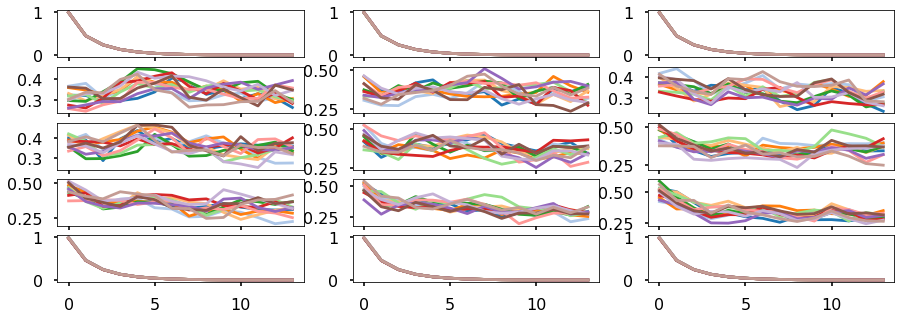

In [26]:
from scipy.stats import sem
tmp = next(iter(data.values()))


nnodes, trials, npulse, ntemp, deltas = tmp.shape
fig, ax = plt.subplots(npulse, ntemp, figsize = (15,5))
xr = np.arange(deltas)
for p in range(npulse):
    for t in range(ntemp):
        axi = ax[p, t]
        
        for node in range(nnodes):
            axi.plot(xr, tmp[node, :, p, t, :].mean(0), \
                     color = colors[node],\
                    )
fig.show()

In [60]:
overlaps = overlaps.squeeze()

from Utils.stats import bootStrap, justReturnX, ratio

N = int(1e5)
Nbc = 1000
boots = bootStrap(overlaps.reshape(-1, conditions), ratio, N, Nbc)
tmp = np.moveaxis(overlaps, 1, 0) + 1e-2
hboots = bootStrap(tmp, ratio, N, Nbc)


In [61]:
# concatenate data
allboots = np.concatenate((hboots, boots[:, None]), axis = 1)

print(boots.shape, hboots.shape, allboots.shape)
_, statconditions, _ = allboots.shape
binned = np.zeros((allboots.shape[1:]), dtype = list)

for idx in range(statconditions):
    for cond in range(conditions - 1):
        tmp = allboots[..., idx, cond]
        c, b = np.histogram(tmp, density = 1, bins = 50)
        b = (b[:-1] + b[1:]) / 2
        binned[idx, cond] = [b, c]


(100000, 4) (100000, 11, 4) (100000, 12, 4)


<ipython-input-75-f9ff8f8c5309>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


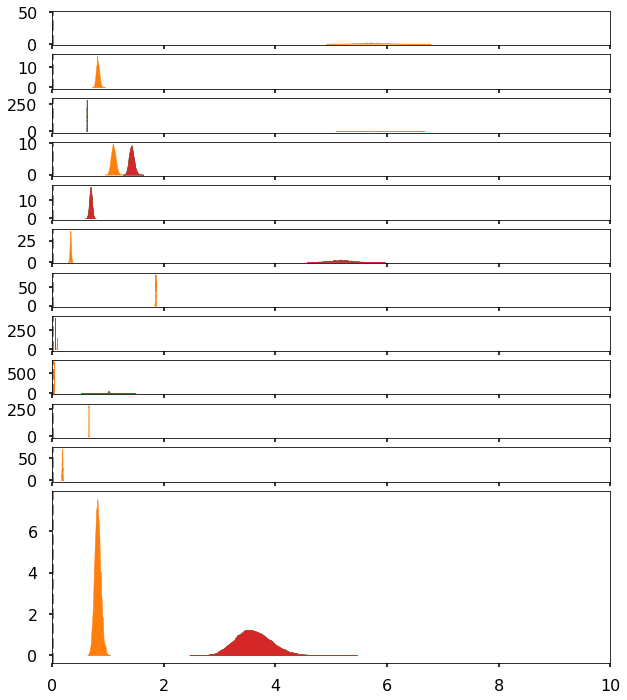

In [75]:
%matplotlib inline

hs = np.ones(statconditions)
hs[-1] = 5

gs = dict(height_ratios = hs)
fig, ax = plt.subplots(statconditions, 1, sharex = 'all',\
                      gridspec_kw = gs,\
                      figsize = (10, 12))

colors = plt.cm.tab10(range(conditions - 1))
for idx, axi in enumerate(ax):
    for cond in range(conditions - 1):
        b, c = binned[idx, cond]
#         print(c.max())
#         c = (c - c.min()) / (c.max() - c.min())
        axi.fill_between(b, 0, c, color = colors[cond])
    axi.set_xlim(0, 10)
    axi.axvline(0, 0, 1, linestyle = 'dashed',\
               color = 'gray')
fig.show()


# Time data widget

<IPython.core.display.Javascript object>


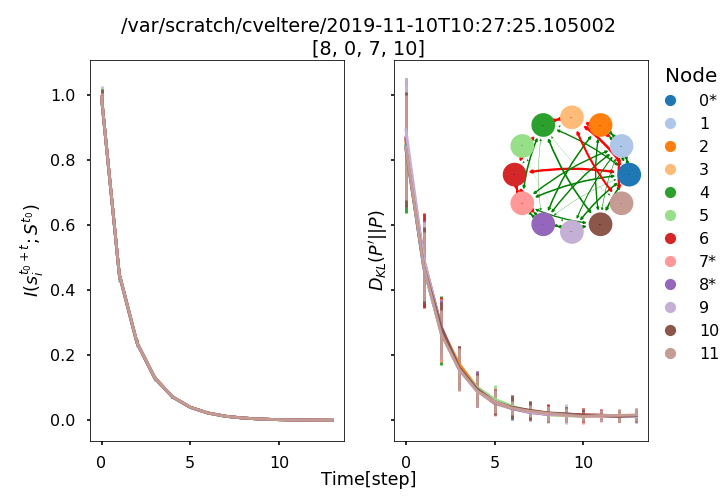

interactive(children=(Select(description='dataName', options=('/var/scratch/cveltere/2019-11-10T10:27:25.10500…

In [74]:
%matplotlib notebook
import ipywidgets as widgets
from scipy.stats import sem
from Utils.plotting import addGraphPretty

# dataSlider = widgets.SelectionSlider(options = data.keys())
dataSlider = widgets.Select(options = data.keys())
tempSlider = widgets.IntSlider(min = 0, max = 2)


pulseSlider = widgets.IntSlider(min = 1, max = npulse - 1)


%matplotlib notebook
fig, (left, right) = plt.subplots(1, 2, figsize = (10, 7), sharey = 'all')
mainax = fig.add_subplot(111, frameon = 0,\
                        xticks = [],\
                        yticks = [])
mainax.set_xlabel('Time[step]', labelpad = 30)
# inax.axis('off')
@widgets.interact(dataName = dataSlider, \
                  temp = tempSlider, \
                  pulse = pulseSlider)
def update(dataName, temp, pulse):
    d = rata.get(dataName)
    
    for idx, i in enumerate(data.keys()):
        if i == dataName:
            break
    drivers = DRIVERS[dataName][pulse, temp]
    
    mainax.set_title(dataName + "\n" + str(drivers))
    g = settings.get(dataName).get('graph')
    
    nodes, trials, pulses, temps, deltas = d.shape
    colors = plt.cm.tab20(range(nodes))
    means = d.mean(1)
    sems  =  2 * np.std(d, axis = 1)
    xr = np.arange(d.shape[-1])
    
    left.cla(); right.cla()
    
    inax = right.inset_axes([.4, 0.4, .6, .6])
    addGraphPretty(g, ax = inax)
    inax.axis('off')
    for node in range(nodes):
        left.errorbar(xr, means[node, 0, temp], \
                      sems[node, 0, temp], \
                      color = colors[node],\
                      label = node)
        right.errorbar(xr, means[node, pulse, temp], \
                       sems[node, pulse, temp], \
                       color = colors[node],\
                       label = node)
    
    
    elems = [\
             plt.Line2D([], [], color = colors[node], \
                  label = f'{node}{"*" if node in drivers else ""}', \
                  marker = 'o', linestyle = 'None')\
                  for node in range(nodes)\
          ]
    left.set_ylabel(r'$I(s_i^{t_0 + t} ; S^{t_0})$')
    right.set_ylabel(r"$D_{KL}(P' \vert \vert P)$")
    right.legend(handles = elems, \
                 bbox_to_anchor = (1.0, 1), loc = 'upper left',\
                title = 'Node', title_fontsize = 20,\
                frameon = 0,\
                borderaxespad = 0)
    print(dataName)

In [13]:
from statistics import NormalDist
import numpy as np
a = np.random.rand(100)
d =NormalDist().from_samples(a)

d.variance

0.07509340602671076